# Choosing audio length for loopback & clipping

It makes sense to bring all audio samples to the same length because:
* RNNs in Keras require input to be of the shape \[`num_samples`, `num_timesteps`, `num_features`\], which means that all the sequences need to must be of the same length `num_timesteps`.
* We don't want the model to learn length of the audio sample as a feature. In other words, we don't want the model to classify an audio sample as asthma, covid or normal based on the length of the audio sample. (Note that in the KDE plot for breath audio samples, the covid distribution is significantly different from asthma, normal and overall distributions.)

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from tqdm import tqdm
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')

from set_audio_params import *

In [2]:
# Paths to asthma, covid and normal breath training directories.
dirpath_breath_asthma = os.path.join('..', 'data_raw', 'data_breath', 'train', 'asthma')
dirpath_breath_covid = os.path.join('..', 'data_raw', 'data_breath', 'train', 'covid')
dirpath_breath_normal = os.path.join('..', 'data_raw', 'data_breath', 'train', 'normal')

In [3]:
%%script echo "Comment line with %%script echo to run this cell."

lengths_breath_asthma = list()
for file in tqdm(os.listdir(dirpath_breath_asthma)):
    file = os.path.join(dirpath_breath_asthma, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_breath_asthma.append(len(waveform) / sampling_rate)
lengths_breath_covid = list()
for file in tqdm(os.listdir(dirpath_breath_covid)):
    file = os.path.join(dirpath_breath_covid, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_breath_covid.append(len(waveform) / sampling_rate)
lengths_breath_normal = list()
for file in tqdm(os.listdir(dirpath_breath_normal)):
    file = os.path.join(dirpath_breath_normal, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_breath_normal.append(len(waveform) / sampling_rate)
lengths_breath = lengths_breath_asthma + lengths_breath_covid +lengths_breath_normal

with open('breath_audio_lens.pickle', 'wb') as f:
    pickle.dump([lengths_breath, lengths_breath_asthma, lengths_breath_covid, lengths_breath_normal], f)

Comment line with %%script echo to run this cell.


In [4]:
# Paths to asthma, covid and normal cough training directories.
dirpath_cough_asthma = os.path.join('..', 'data_raw', 'data_cough', 'train', 'asthma')
dirpath_cough_covid = os.path.join('..', 'data_raw', 'data_cough', 'train', 'covid')
dirpath_cough_normal = os.path.join('..', 'data_raw', 'data_cough', 'train', 'normal')

In [5]:
%%script echo "Comment line with %%script echo to run this cell."

lengths_cough_asthma = list()
for file in tqdm(os.listdir(dirpath_cough_asthma)):
    file = os.path.join(dirpath_cough_asthma, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_cough_asthma.append(len(waveform) / sampling_rate)
lengths_cough_covid = list()
for file in tqdm(os.listdir(dirpath_cough_covid)):
    file = os.path.join(dirpath_cough_covid, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_cough_covid.append(len(waveform) / sampling_rate)
lengths_cough_normal = list()
for file in tqdm(os.listdir(dirpath_cough_normal)):
    file = os.path.join(dirpath_cough_normal, file)
    waveform, _ = librosa.load(file, sr=sampling_rate)
    lengths_cough_normal.append(len(waveform) / sampling_rate)
lengths_cough = lengths_cough_asthma + lengths_cough_covid +lengths_cough_normal

with open('cough_audio_lens.pickle', 'wb') as f:
    pickle.dump([lengths_cough, lengths_cough_asthma, lengths_cough_covid, lengths_cough_normal], f)

Comment line with %%script echo to run this cell.


In [6]:
with open('breath_audio_lens.pickle', 'rb') as f:
    lengths_breath, lengths_breath_asthma, lengths_breath_covid, lengths_breath_normal = pickle.load(f)
with open('cough_audio_lens.pickle', 'rb') as f:
    lengths_cough, lengths_cough_asthma, lengths_cough_covid, lengths_cough_normal = pickle.load(f)

mean(total)=13.0385s
median(total)=12.0s
mode(total)=12.96s
max(total)=30.0s
min(total)=0.48s
percentile95(total)=24.29s


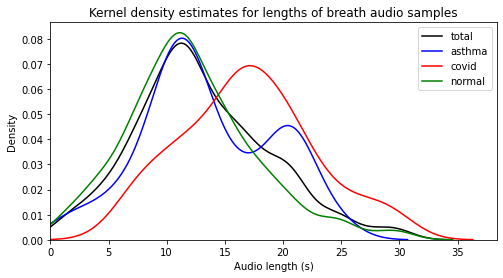

In [7]:
plt.figure(figsize=(8, 4))
plt.title(f'Kernel density estimates for lengths of breath audio samples')
sns.kdeplot(lengths_breath, color='k', label='total')
sns.kdeplot(lengths_breath_asthma, color='b', label='asthma')
sns.kdeplot(lengths_breath_covid, color='r', label='covid')
sns.kdeplot(lengths_breath_normal, color='g', label='normal')
plt.xlabel('Audio length (s)')
plt.xlim([0, None])
plt.legend();

ROUND = 4
print(f'mean(total)={np.round(np.mean(lengths_breath), ROUND)}s')
print(f'median(total)={np.round(np.median(lengths_breath), ROUND)}s')
print(f'mode(total)={np.round(scipy.stats.mode(lengths_breath).mode[0], ROUND)}s')
print(f'max(total)={np.round(np.max(lengths_breath), ROUND)}s')
print(f'min(total)={np.round(np.min(lengths_breath), ROUND)}s')
print(f'percentile95(total)={np.round(np.percentile(lengths_breath, 95), ROUND)}s')

mean(total)=5.8165s
median(total)=5.44s
mode(total)=5.04s
max(total)=24.96s
min(total)=0.54s
percentile95(total)=9.92s


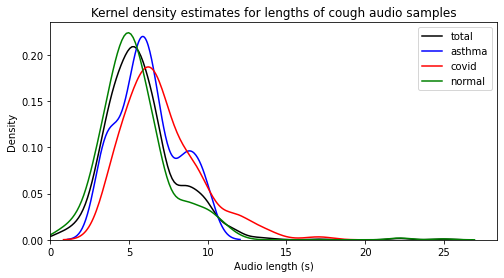

In [8]:
plt.figure(figsize=(8, 4))
plt.title(f'Kernel density estimates for lengths of cough audio samples')
sns.kdeplot(lengths_cough, color='k', label='total')
sns.kdeplot(lengths_cough_asthma, color='b', label='asthma')
sns.kdeplot(lengths_cough_covid, color='r', label='covid')
sns.kdeplot(lengths_cough_normal, color='g', label='normal')
plt.xlabel('Audio length (s)')
plt.xlim([0, None])
plt.legend();

ROUND = 4
print(f'mean(total)={np.round(np.mean(lengths_cough), ROUND)}s')
print(f'median(total)={np.round(np.median(lengths_cough), ROUND)}s')
print(f'mode(total)={np.round(scipy.stats.mode(lengths_cough).mode[0], ROUND)}s')
print(f'max(total)={np.round(np.max(lengths_cough), ROUND)}s')
print(f'min(total)={np.round(np.min(lengths_cough), ROUND)}s')
print(f'percentile95(total)={np.round(np.percentile(lengths_cough, 95), ROUND)}s')